### **심근경색증 양성/음성 이진 분류**

In [2]:
import pandas as pd

cardiac_infarction = pd.read_csv("train.csv")

cardiac_infarction

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,70,1,87,141,81,106.0,0.929,1.150,1
1,65,1,76,133,75,125.0,4.570,0.549,1
2,60,1,80,135,75,94.0,147.400,3.850,1
3,63,1,64,122,60,188.0,2.190,0.046,1
4,65,1,60,129,55,117.0,1.900,0.078,1
...,...,...,...,...,...,...,...,...,...
1050,41,1,66,105,59,162.0,0.515,0.003,0
1051,60,1,72,113,64,161.0,2.930,0.014,0
1052,60,1,66,160,83,234.0,1.220,0.203,1
1053,56,1,57,110,60,101.0,4.050,0.017,1


In [3]:
cardiac_infarction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1055 non-null   int64  
 1   gender         1055 non-null   int64  
 2   impluse        1055 non-null   int64  
 3   pressurehight  1055 non-null   int64  
 4   pressurelow    1055 non-null   int64  
 5   glucose        1055 non-null   float64
 6   kcm            1055 non-null   float64
 7   troponin       1055 non-null   float64
 8   class          1055 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 74.3 KB


In [409]:
input_data = cardiac_infarction[["gender", "kcm", "troponin"]]
input_data

,gender,kcm,troponin
0,1,0.929,1.150
1,1,4.570,0.549
2,1,147.400,3.850
3,1,2.190,0.046
4,1,1.900,0.078
...,...,...,...
1050,1,0.515,0.003
1051,1,2.930,0.014
1052,1,1.220,0.203
1053,1,4.050,0.017


In [410]:
x = input_data.to_numpy()
x

array([[1.000e+00, 9.290e-01, 1.150e+00],
       [1.000e+00, 4.570e+00, 5.490e-01],
       [1.000e+00, 1.474e+02, 3.850e+00],
       ...,
       [1.000e+00, 1.220e+00, 2.030e-01],
       [1.000e+00, 4.050e+00, 1.700e-02],
       [1.000e+00, 2.560e+00, 9.900e-02]])

In [411]:
y = cardiac_infarction["class"].to_numpy()
y

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [674]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(x_train.shape)
print(x_test.shape)

(844, 3)
(211, 3)


In [675]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

ss.fit(x_train)

x_train_scaled = ss.transform(x_train)
x_test_scaled = ss.transform(x_test)

In [676]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)

model.fit(x_train_scaled, y_train)

print("학습 데이터셋:", model.score(x_train_scaled, y_train))
print("시험 데이터셋:", model.score(x_test_scaled, y_test))

학습 데이터셋: 0.981042654028436
시험 데이터셋: 0.981042654028436


In [677]:
score = 0
hist = []

for n in range(2,101):
    model.n_neighbors = n
    
    tmp = model.score(x_train_scaled, y_train)
    hist.append(tmp)
    
    if score < tmp:
        score = tmp
        best_k = n
        
print("최적의 k값:", best_k)
print("최고 정확도:", score)

최적의 k값: 2
최고 정확도: 0.9834123222748815


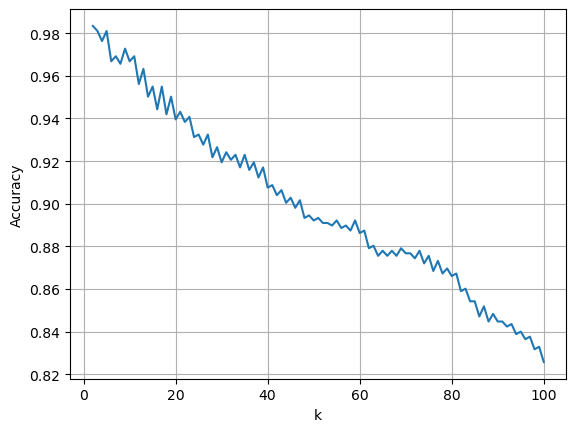

In [681]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(range(2,101), hist)
plt.xlabel('k')
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

In [686]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=2, random_state=42)
dt.fit(x_train_scaled, y_train)
print("학습 데이터셋:", dt.score(x_train_scaled, y_train))
print("시험 데이터셋:", dt.score(x_test_scaled, y_test))

학습 데이터셋: 0.9881516587677726
시험 데이터셋: 0.981042654028436


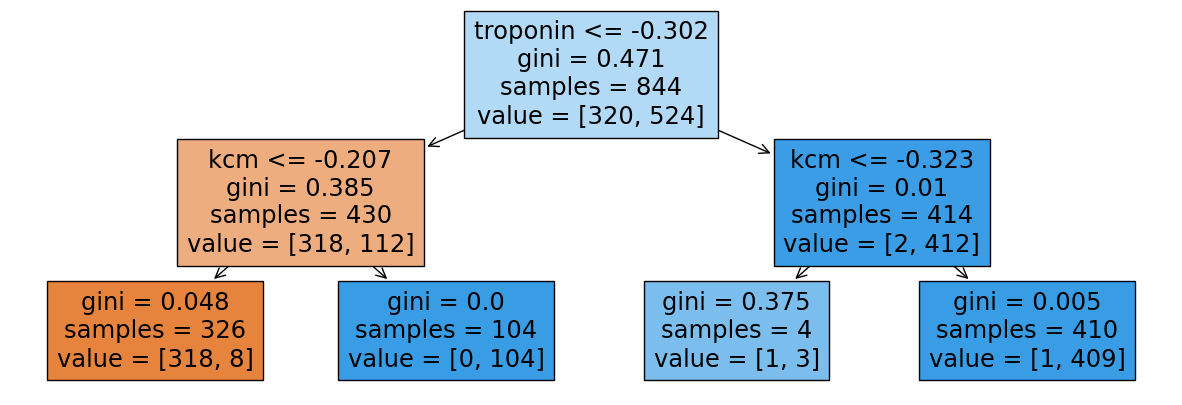

In [687]:
from sklearn.tree import plot_tree

plt.figure(figsize=(15,5))
plot_tree(dt, feature_names=["gender", "kcm", "troponin"], filled=True)
plt.show()

In [690]:
test = pd.read_csv("test.csv")

y_pred = test[["gender", "kcm", "troponin"]].to_numpy()
y_pred_scaled = ss.transform(y_pred)

y_pred_test = dt.predict(y_pred_scaled)

test["predicted_class"] = y_pred_test

print(test)

     age  gender  impluse  pressurehight  pressurelow  glucose    kcm  \
0     56       1       76            150          100      103   2.36   
1     55       0       59            110           65      208   2.53   
2     55       1       74            168           97      102   2.00   
3     72       1       67            176           95       94   4.22   
4     59       0       62             76           55      130   2.21   
..   ...     ...      ...            ...          ...      ...    ...   
259   61       1      102            130           83      201   1.24   
260   64       1       83            140           81       91   1.63   
261   70       1       93            128           69       92   1.95   
262   65       1       70            117           61       84   1.58   
263   60       0       72            138           86      124  15.88   

     troponin  predicted_class  
0       0.019                1  
1       0.024                1  
2       0.014           

In [696]:
print(y_pred_test)


[1 1 0 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 0 1 0 0 0 1 0 1 0 0 0 1 1 0 1 1 0 0
 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 1 0 0 0 0 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 1
 1 1 1 0 1 0 0 0 0 0 1 1 1 0 1 0 1 1 1 0 1 0 0 1 0 1 1 1 0 1 0 1 1 0 1 0 0
 1 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 0 1 1 0 1 0 1 1 0 1 1 0
 0 1 1 1 0 0 0 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 0
 0 1 1 1 0 1 0 1 0 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 0 0 0 0 0 1 1
 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1 1 1 1 0 0 1 1 1 0 1 0 1 0 1 0
 1 1 1 1 1]


In [697]:
y_pred_test = y_pred_test.reshape(264,1)

print(y_pred_test)

[[1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
